In [1]:
import os

import tensorflow as tf
from tensorflow import keras
from keras import callbacks

from utilities.classification_utils import ClassificationModel
from utilities.data_preparation import FilePreparation, DataPreparation
from utilities.settings import Settings

gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
files = [os.path.abspath(os.path.join("./ref_sel", p)) for p in os.listdir("./ref_sel")]
files

['/Users/v_vlsv/PyCharmProjects/CellScanner/CellScanner_1.2.0/ref_sel/Bacteroides_uniformis-050520-mGAM-2.fcs',
 '/Users/v_vlsv/PyCharmProjects/CellScanner/CellScanner_1.2.0/ref_sel/.DS_Store',
 '/Users/v_vlsv/PyCharmProjects/CellScanner/CellScanner_1.2.0/ref_sel/Blautia_hydrogenotrophica-211119-GAM-2.fcs',
 '/Users/v_vlsv/PyCharmProjects/CellScanner/CellScanner_1.2.0/ref_sel/Blautia_hydrogenotrophica-211119-GAM-1.fcs',
 '/Users/v_vlsv/PyCharmProjects/CellScanner/CellScanner_1.2.0/ref_sel/Bacteroides_thetaiotaomicron-050520-mGAM-1.fcs',
 '/Users/v_vlsv/PyCharmProjects/CellScanner/CellScanner_1.2.0/ref_sel/Bacteroides_uniformis-130520-mGAM-1.fcs',
 '/Users/v_vlsv/PyCharmProjects/CellScanner/CellScanner_1.2.0/ref_sel/Blautia_hydrogenotrophica-130520-mGAM-1.fcs',
 '/Users/v_vlsv/PyCharmProjects/CellScanner/CellScanner_1.2.0/ref_sel/Bacteroides_thetaiotaomicron-050520-mGAM-2.fcs',
 '/Users/v_vlsv/PyCharmProjects/CellScanner/CellScanner_1.2.0/ref_sel/Escherichia_coli-050520-mGAM-1.fcs',
 '/

In [3]:
files.pop(1)
file_preparation = FilePreparation(files=files, settings=Settings())
dataframe = file_preparation.get_aggregated()
labels = file_preparation.get_labels()
labels_shape = file_preparation.get_labels_shape()
data_preparation = DataPreparation(dataframe=dataframe, labels=labels, batch_size=512)
training_set, test_set = data_preparation.create_datasets()
feature_shape = None
for elem in training_set.take(1):
 	feature_shape = elem[0]["input_1"][0].shape

# After modification ClassificationModel needs extra arguments at class instantiating
model = ClassificationModel(num_classes=labels_shape, num_features=feature_shape, fc_type="Accuri", lr=1e-3).get_model()

2022-10-02 00:41:31.007260: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-02 00:41:31.007390: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max
[[3.291591  3.1373541 5.6044507 ... 4.644793  4.123231  3.4116197]
 [3.3558345 3.109241  4.341197  ... 3.5118833 3.155943  2.6541765]
 [3.6379898 3.0330215 5.145231  ... 4.1882815 3.5434473 3.191451 ]
 ...
 [4.211761  2.7678976 4.2997904 ... 3.3539162 2.7923918 2.269513 ]
 [3.8541846 3.1917305 4.517618  ... 3.636488  3.2882493 3.0220158]
 [4.1459417 3.1182647 4.4678154 ... 3.5602653 2.9164538 2.690196 ]] tf.Tensor([1. 1. 1. ... 3. 3. 3.], shape=(37377,), dtype=float32)


In [8]:
def plot():
	from matplotlib import pyplot as plt

	plt.figure(figsize=(15,8))
	plt.subplot(1, 2, 1)
	plt.plot(history.history["accuracy"])
	plt.plot(history.history["val_accuracy"])
	plt.title("Model Accuracy")
	plt.ylabel("Accuracy")
	plt.xlabel("Epoch")
	plt.legend(["Train", "Validation"], loc="upper left")

	plt.subplot(1, 2, 2)
	plt.plot(history.history["loss"])
	plt.plot(history.history["val_loss"])
	plt.title("Loss Function")
	plt.ylabel("Loss")
	plt.xlabel("Epoch")
	plt.legend(["Train", "Validation"], loc="upper left")
	plt.show()


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/500


2022-05-16 23:03:49.085678: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 23:03:49.085758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


474/474 [==============================] - ETA: 0s - loss: 1.8830 - accuracy: 0.4001

2022-05-16 23:03:58.822952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


474/474 [==============================] - 11s 23ms/step - loss: 1.8830 - accuracy: 0.4001 - val_loss: 1.8055 - val_accuracy: 0.3437 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999980475013564.
Epoch 2/500
474/474 [==============================] - 10s 22ms/step - loss: 1.5493 - accuracy: 0.4658 - val_loss: 1.5034 - val_accuracy: 0.4665 - lr: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.0009999940684607064.
Epoch 3/500
474/474 [==============================] - 10s 22ms/step - loss: 1.3073 - accuracy: 0.5420 - val_loss: 1.4205 - val_accuracy: 0.5082 - lr: 9.9999e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.000999988110387376.
Epoch 4/500
474/474 [==============================] - 10s 22ms/step - loss: 1.1645 - accuracy: 0.5839 - val_loss: 1.2479 - val_accuracy: 0.5448 - lr: 9.9999e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0009999800568788481.
Epoch 5/500
474/474 [============================

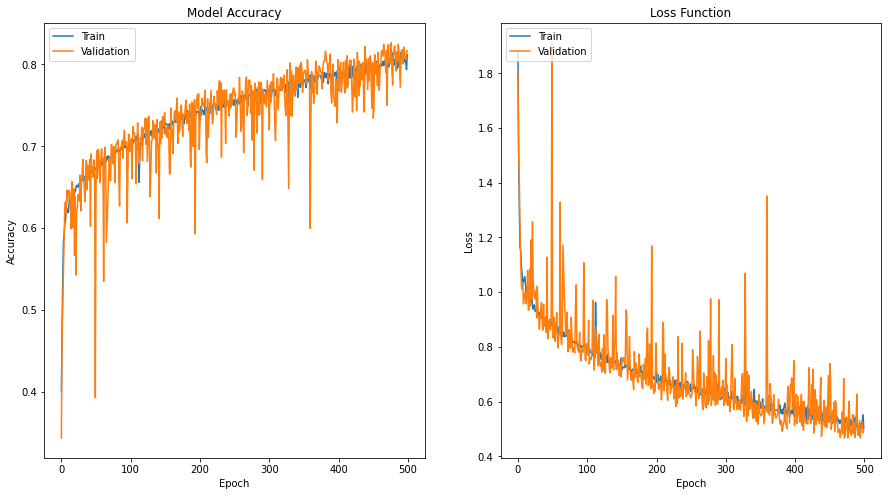

In [4]:
# V14. Batch Size 128, initial learning rate 1e-3.

initial_learning_rate = 0.001
epochs = 500
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

learning_rate = callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)
checkpoint_cb = callbacks.ModelCheckpoint("classifier_14_128.h5", save_best_only=True)

history = model.fit(training_set, validation_data=test_set, epochs=500, callbacks = [learning_rate, checkpoint_cb])

plot()


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/300


2022-09-30 14:26:43.694878: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-30 14:26:43.695268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


59/59 [==============================] - ETA: 0s - loss: 0.9270 - accuracy: 0.6701

2022-09-30 14:26:45.884154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


59/59 [==============================] - 3s 35ms/step - loss: 0.9270 - accuracy: 0.6701 - val_loss: 1.3864 - val_accuracy: 0.1442 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999967141750706.
Epoch 2/300
59/59 [==============================] - 2s 28ms/step - loss: 0.7006 - accuracy: 0.7524 - val_loss: 1.4514 - val_accuracy: 0.2957 - lr: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.000999990004853086.
Epoch 3/300
59/59 [==============================] - 2s 28ms/step - loss: 0.6095 - accuracy: 0.7704 - val_loss: 1.0928 - val_accuracy: 0.5185 - lr: 9.9999e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009999800359794142.
Epoch 4/300
59/59 [==============================] - 2s 27ms/step - loss: 0.5646 - accuracy: 0.7824 - val_loss: 1.2163 - val_accuracy: 0.5613 - lr: 9.9998e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0009999666911728814.
Epoch 5/300
59/59 [==============================] - 2s 28ms/

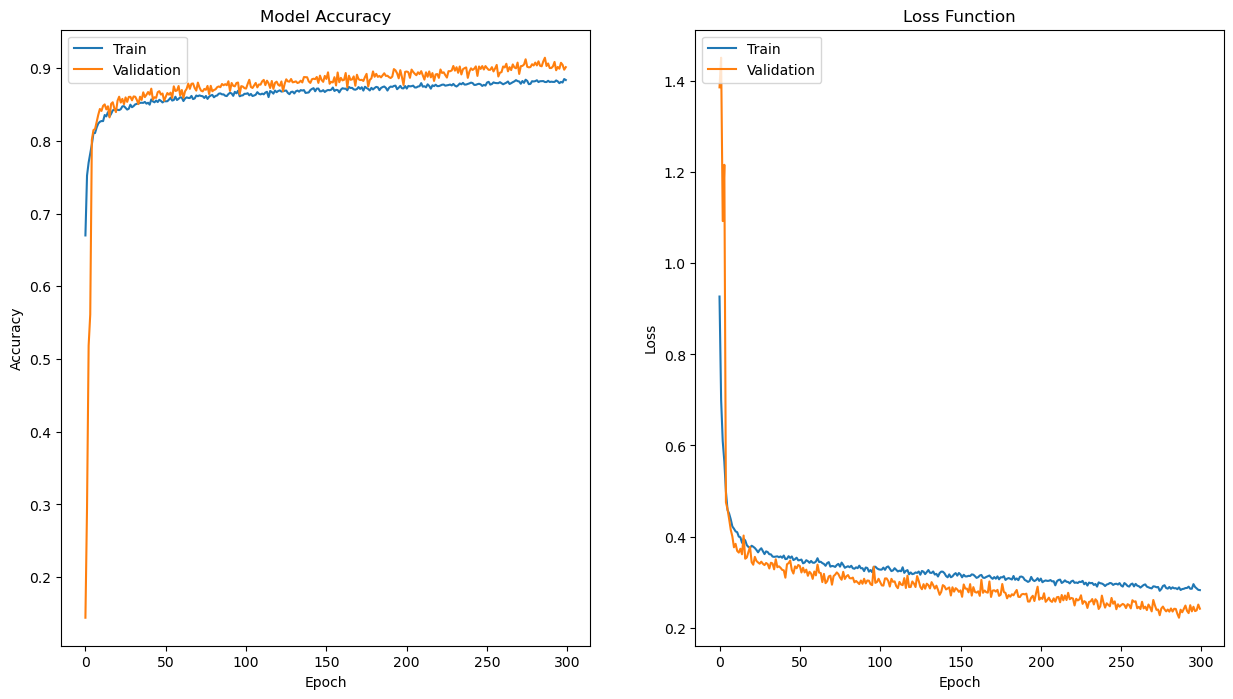

In [5]:
# V15. Batch Size 512, initial learning rate 1e-3.

initial_learning_rate = 0.001
epochs = 300
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

learning_rate = callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)
checkpoint_cb = callbacks.ModelCheckpoint("classifier_15_512.h5", save_best_only=True)

history = model.fit(training_set, validation_data=test_set, epochs=300, callbacks = [learning_rate, checkpoint_cb])

plot()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 100)               1300      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               30300     
                                                                 
 activation_1 (Activation)   (None, 300)               0         
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                        

In [9]:
history = model.fit(training_set, validation_data=test_set, epochs=300)

Epoch 1/300


2022-10-02 00:13:09.693422: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-02 00:13:09.696277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/59 [============>.................] - ETA: 0s - loss: 1.0274 - accuracy: 0.5975

KeyboardInterrupt: 